### Bike data set 
* Dataset (https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv)
* **Objective** Predict bike rentals based on hourly rental data. We are provided other weather data like temperature and windspeed.


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import numpy as np
import xlwings as xw

In [18]:
bike=pd.read_csv('Bike_Data/train.csv')

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Exploratory Data Analysis
* First we convert the datetime column to a datetime datatype
* Next we check if any of the columns have null or missing values
* We then check the following relationships.
    * Relationship between month of year and count of rentals
    * Relationship between temperature and count of Rentals 

In [91]:
bike.isna().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
count          0
MonthofYear    0
dtype: int64

In [92]:
bike['datetime']=pd.to_datetime(bike.datetime)

In [93]:
bike.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [94]:
bike['MonthofYear']=bike.datetime.dt.month

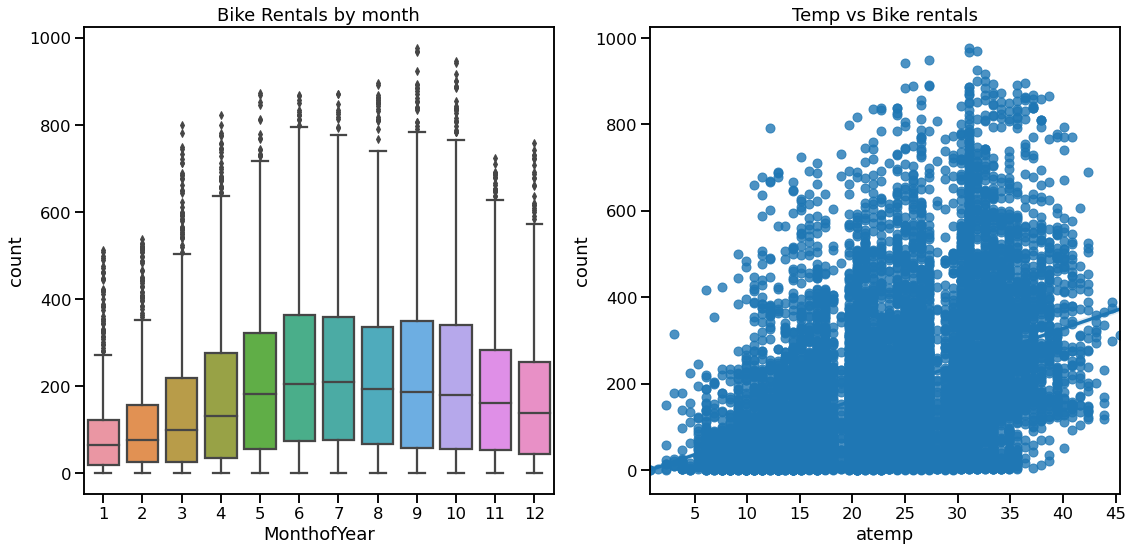

In [95]:
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
sns.boxplot(x='MonthofYear',y='count',data=bike,ax=ax0)
sns.regplot(x='atemp',y='count',data=bike,ax=ax1)
ax0.set_title('Bike Rentals by month')
ax1.set_title('Temp vs Bike rentals')
plt.tight_layout()
sns.set_context('talk')
#sns.set_theme('dark')
plt.show()

In [96]:
corr_mat=bike.corr().round(2)
corr_mat

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,MonthofYear
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.16,0.97
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,-0.01,0.00
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,0.01,-0.00
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.13,0.01
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.39,0.26
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.39,0.26
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.32,0.20
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.10,-0.15
count,0.16,-0.01,0.01,-0.13,0.39,0.39,-0.32,0.10,1.00,0.17
MonthofYear,0.97,0.00,-0.00,0.01,0.26,0.26,0.20,-0.15,0.17,1.00


<AxesSubplot:>

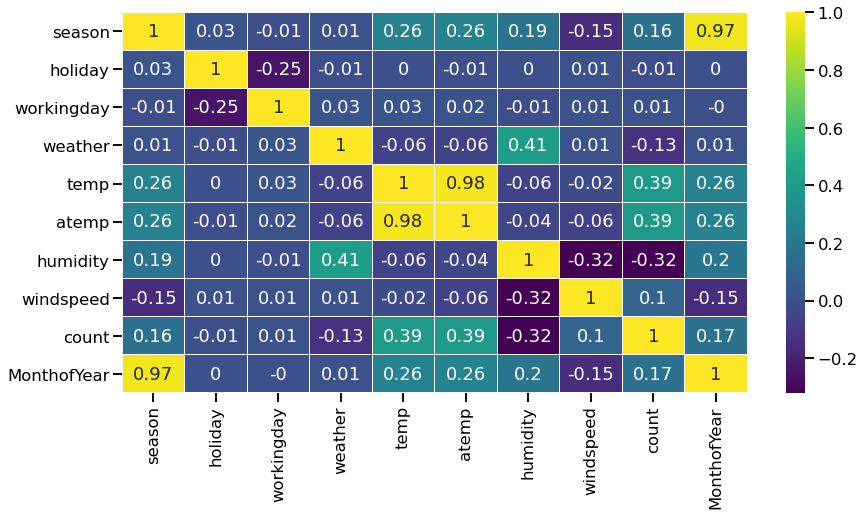

In [97]:
fig,ax=plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
sns.heatmap(corr_mat,annot=True,linewidth=0.3,cmap='viridis')

In [98]:
X=bike[['atemp','MonthofYear','humidity','weather','holiday']]
y=bike['count']

In [99]:
bike.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [100]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [137]:
max_depths=[3,4,5,6,7,8,9,10,11,12,13,14,15]
for max_depth in max_depths:
    dt=DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    score=r2_score(y_test,y_pred)
    print('The r2_score of {} is'.format(max_depth),score)

The r2_score of 3 is 0.2729035614584612
The r2_score of 4 is 0.2933461758021907
The r2_score of 5 is 0.3020717283529035
The r2_score of 6 is 0.3315411248618083
The r2_score of 7 is 0.3387167564534799
The r2_score of 8 is 0.33804856245384707
The r2_score of 9 is 0.2906297437363895
The r2_score of 10 is 0.26413554303785725
The r2_score of 11 is 0.21678787128478594
The r2_score of 12 is 0.1729490378809182
The r2_score of 13 is 0.1496993715713345
The r2_score of 14 is 0.11428308850873681
The r2_score of 15 is 0.07771976118054802


### Now trying Random forest
* We will probably not know the number of registered users ahead of time so drop the columns casual and registered to make this problem interestins
* We can use random forest to get feature importances and use it as a dimensionality reduction technique

In [138]:
#bike.drop(columns=['registered','casual'],inplace=True)

In [139]:
X=bike.drop(columns=['count','datetime'])

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   MonthofYear  10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 765.5 KB


In [141]:
y=bike['count']

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [143]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,MonthofYear
10424,4,0,1,2,16.40,20.455,58,16.9979,11
4516,4,0,1,1,13.12,15.910,81,12.9980,11
6210,1,0,1,1,13.12,17.425,57,0.0000,2
1013,1,0,0,3,13.94,15.150,100,19.9995,3
9748,4,0,1,1,22.96,26.515,49,0.0000,10
...,...,...,...,...,...,...,...,...,...
1212,1,0,1,1,9.84,12.120,75,11.0014,3
5479,1,0,1,1,6.56,6.060,47,31.0009,1
4573,4,0,1,1,21.32,25.000,52,11.0014,11
7397,2,0,1,2,25.42,31.060,50,23.9994,5


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
for max_depth in max_depths:
    rf=RandomForestRegressor(n_estimators=100,max_depth=max_depth)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    score=r2_score(y_test,y_pred)
    print('R2_score with {} max depth is'.format(max_depth),score)

R2_score with 3 max depth is 0.2831040178987668
R2_score with 4 max depth is 0.31367424711340264
R2_score with 5 max depth is 0.3391385442173337
R2_score with 6 max depth is 0.36968743328291354
R2_score with 7 max depth is 0.38884574776360936
R2_score with 8 max depth is 0.4027221784307021
R2_score with 9 max depth is 0.4151018151595607
R2_score with 10 max depth is 0.4240738302492084
R2_score with 11 max depth is 0.4279427587457616
R2_score with 12 max depth is 0.42593473355921707
R2_score with 13 max depth is 0.42133828540750196
R2_score with 14 max depth is 0.4148720334011541
R2_score with 15 max depth is 0.4099136557819919


<AxesSubplot:>

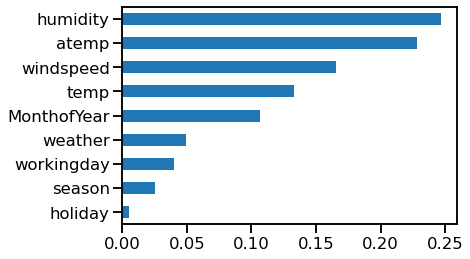

In [146]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind='barh')